In [6]:
import os
import os.path
from subprocess import Popen, PIPE
import numpy as np
import pandas as pd
import time


In [508]:
def reversed_complement(sequence):
    mapping = {'A': 'U', 'G': 'C', 'U': 'A', 'C': 'G'}
    sequence_upper = sequence.upper()

    complement = ''
    for c in sequence_upper:
        complement += mapping[c]

    # reverse the sequence
    return complement[::-1]

In [170]:
#Read results
a=pd.read_excel("Sensors.xls", sheet_name="2_gen_sensors")
a
    

,Toehold switch number,ON/OFF,Switch sequence,Trigger sequence
0,1,665,GGGUCUUAUCUUAUCUAUCUCGUUUAUCCCUGCAUACAGAAACAGA...,GGGACUGACUAUUCUGUGCAAUAGUCAGUAAAGCAGGGAUAAACGA...
1,2,586,GGGAGUUUGAUUACAUUGUCGUUUAGUUUAGUGAUACAUAAACAGA...,GGGACAGAUCCACUGAGGCGUGGAUCUGUGAACACUAAACUAAACG...
2,3,557,GGGAUCUAUUACUACUUACCAUUGUCUUGCUCUAUACAGAAACAGA...,GGGUGAUGGGACAUUCCGAUGUCCCAUCAAUAAGAGCAAGACAAUG...
3,4,483,GGGCGAUUAUGGAUUAGAGCUCCGUUUACUGUCAUACAAGAACAGA...,GGGACGAAUUCACCCUAAUGUGAAUUCGUAAAGACAGUAAACGGAG...
4,5,453,GGGUAUGUAAUUGAUUUGGCUUCUGUUAGUUUCAUACAAGAACAGA...,GGGUCCAUUCUAGGUGAUACUAGAAUGGAGCAGAAACUAACAGAAG...
5,6,409,GGGCUUAAUCUUACCUUCGCUUGUUCUGUUCCGAUACAGAAACAGA...,GGGACAAUCGGGACGACACUCCCGAUUGUGAACGGAACAGAACAAG...
6,7,403,GGGUCACUUAAUCAUUUGUCGUCGUUUCUAUCUAUACAAGAACAGA...,GGGUCGAGUAGACAGAGCUGUCUACUCGAAUAAGAUAGAAACGACG...
7,8,393,GGGACCUCUACUUACUCUCACUCUUACUUCUGCAUAGUAGAACAGA...,GGGACUGAGCUGCUAUCACGCAGCUCAGUAGAGCAGAAGUAAGAGU...
8,9,381,GGGCUUACUACUUUGACACCUGAUUCUGACACGAUAACAGAACAGA...,GGGUCAAUUACCCGUGGUAGGGUAAUUGAAAGCGUGUCAGAAUCAG...
9,10,343,GGGAAUGGAAUGAAUGAACUGCUUGUCUUAUGUAUACAGAAACAGA...,GGGCGAAGUGUCCGUAUGAGGACACUUCGACGACAUAAGACAAGCA...


In [18]:
def split_sequence(sequence, window):
    sequences = []
    limit = len(sequence) - window + 1

    for i in range(0, limit):
        sequences.append(sequence[i:window + i])

    return sequences

In [475]:
# Calculation of DG of
def DG(sequence,result_path,wait):
    file = open('{}pipo.in'.format(result_path), 'w')
    file.write("{}\n".format(sequence))
    file.close()
    final=[]
    semi_final=[]

    Popen(["mfe -T 23 {}pipo".format(result_path)],shell=True, stdout=PIPE)
    time.sleep(wait)
    lenght=len(sequence)
    with open("{}pipo.mfe".format(result_path)) as res:
        for r in res:
            r = r.strip('\n')
            if not r.startswith('%'):
                r = r.split('\t')
                semi_final.append(r)

    #final.append()                

    return (float(semi_final[2][0]))

    os.remove("{}pipo.mfe".format(result_path,))
    os.remove("{}pipo.in".format(result_path))


In [477]:
Dg_Switch=[]
for i in range(len(a.iloc[:,2])):
    Dg_Switch.append(DG(a.iloc[i,2],"",1))
P1=pd.Series(Dg_Switch)

In [200]:
Dg_Trigger=[]
for i in range(len(a.iloc[:,3])):
    Dg_Trigger.append(DG(a.iloc[i,3],"",1))
P2=pd.Series(Dg_Trigger)

In [181]:
#Incorporating this parameters as columns in the result DataFrame
a["DeltaG_Swtitch"]=P1.values
a["DeltaG_Trigger"]=P2.values

In [469]:
def DG_2(sequence1, sequence2, result_path,wait):
    
    
    file = open("{}Pipe.in".format(result_path), 'w')
    file.write("{}\n".format("2"))
    file.write("{}\n".format(sequence1))
    file.write("{}\n".format(sequence2))
    file.write("{}\n".format("1 2"))
    file.close()

    semi_final=[]
    Popen(["mfe -multi {}Pipe".format(result_path)],shell=True, stdout=PIPE)
    time.sleep(wait)
    #lenght=len(sequence)
    with open("{}Pipe.mfe".format(result_path)) as res:
        for r in res:
            r = r.strip('\n')
            if not r.startswith('%'):
                r = r.split('\t')
                semi_final.append(r)
    os.remove("{}Pipe.in".format(result_path))
    os.remove("{}Pipe.mfe".format(result_path))            
    return (float(semi_final[2][0]))

In [470]:
DG_2(a.iloc[0,2],a.iloc[0,3],"",10)

-70.681

In [472]:
Dg_Complex=[]
for i in range(len(a.iloc[:,3])):
    Dg_Complex.append(DG_2(a.iloc[i,2],a.iloc[i,3],"",2))
P3=pd.Series(Dg_Complex)

In [473]:
a["DeltaG_Complex"]=P3.values

In [488]:
#Verifying that all the sequences are the same lenght
for i in range(0,12):
    print(len(a.iloc[i,2]))
for i in range(0,12):
    print(len(a.iloc[i,3]))

120
120
120
120
120
120
120
120
120
120
120
120
65
65
65
65
65
65
65
65
65
65
65
65


In [492]:
Dg_min_Switch=[]
for i in range(len(a.iloc[:,2])):
    Dg_min_Switch.append(DG(a.iloc[i,2][0:68],"",1))
P4=pd.Series(Dg_min_Switch)

Dg_min_Trigger=[]
for i in range(len(a.iloc[:,3])):
    Dg_min_Trigger.append(DG(a.iloc[i,3][32:62],"",1))
P5=pd.Series(Dg_min_Trigger)

In [496]:
Dg_min_Complex=[]
for i in range(len(a.iloc[:,3])):
    Dg_min_Complex.append(DG_2(a.iloc[i,2][0:68],a.iloc[i,3][32:62],"",2))
P6=pd.Series(Dg_min_Complex)

In [497]:
#Incorporating this parameters as columns in the result DataFrame
a["DeltaG_minSwtitch"]=P4.values
a["DeltaG_minTrigger"]=P5.values
a["DeltaG_minComplex"]=P6.values

In [505]:
#Net DG complex= DG Complex- DG switch - DG trigger.
P7=P3-P2-P1 
P8=P6-P5-P4

In [506]:
a["Net_DeltaG_Complex"]=P7.values
a["Net_DeltaG_minComplex"]=P8.values

In [514]:
for i in 
toehold=a.iloc[i,2][3:18]
triger=a.iloc[i,3][32:62]

'UCUUAUCUUAUCUAU'

In [515]:
trigger=(a.iloc[i,3][32:62])

30

In [518]:
Dg_toehold_binding=[]
for i in range(len(a.iloc[:,3])):
    toehold=a.iloc[i,2][3:18]
    Dg_toehold_binding.append(DG_2(toehold,reversed_complement(toehold),"",2))
P9=pd.Series(Dg_toehold_binding)

Dg_trigger_binding=[]
for i in range(len(a.iloc[:,3])):
    trigger=(a.iloc[i,3][32:62])
    Dg_trigger_binding.append(DG_2(trigger,reversed_complement(trigger),"",2))
P10=pd.Series(Dg_trigger_binding)

In [519]:
a["DeltaG_toehold_binding"]=P9.values
a["DeltaG_trigger_binding"]=P10.values

In [520]:
a

,Toehold switch number,ON/OFF,Switch sequence,Trigger sequence,DeltaG_Swtitch,DeltaG_Trigger,DeltaG_Complex,DeltaG_minSwtitch,DeltaG_minTrigger,DeltaG_minComplex,Net_DeltaG_Complex,Net_DeltaG_minComplex,DeltaG_toehold_binding,DeltaG_trigger_binding
0,1,665,GGGUCUUAUCUUAUCUAUCUCGUUUAUCCCUGCAUACAGAAACAGA...,GGGACUGACUAUUCUGUGCAAUAGUCAGUAAAGCAGGGAUAAACGA...,-27.6,-11.6,-70.681,-19.828,-0.591,-49.281,-19.241,-28.862,-18.181,-47.381
1,2,586,GGGAGUUUGAUUACAUUGUCGUUUAGUUUAGUGAUACAUAAACAGA...,GGGACAGAUCCACUGAGGCGUGGAUCUGUGAACACUAAACUAAACG...,-25.9,-16.1,-71.181,-19.684,-1.356,-45.181,-17.232,-24.141,-18.481,-42.181
2,3,557,GGGAUCUAUUACUACUUACCAUUGUCUUGCUCUAUACAGAAACAGA...,GGGUGAUGGGACAUUCCGAUGUCCCAUCAAUAAGAGCAAGACAAUG...,-27.5,-19.2,-75.481,-18.908,-3.176,-47.381,-17.896,-25.297,-17.981,-46.281
3,4,483,GGGCGAUUAUGGAUUAGAGCUCCGUUUACUGUCAUACAAGAACAGA...,GGGACGAAUUCACCCUAAUGUGAAUUCGUAAAGACAGUAAACGGAG...,-30.3,-16.2,-75.312,-22.914,-5.212,-51.281,-17.074,-23.155,-20.381,-49.381
4,5,453,GGGUAUGUAAUUGAUUUGGCUUCUGUUAGUUUCAUACAAGAACAGA...,GGGUCCAUUCUAGGUGAUACUAGAAUGGAGCAGAAACUAACAGAAG...,-28.5,-14.2,-73.012,-19.512,-1.273,-45.281,-19.161,-24.496,-16.681,-43.381
5,6,409,GGGCUUAAUCUUACCUUCGCUUGUUCUGUUCCGAUACAGAAACAGA...,GGGACAAUCGGGACGACACUCCCGAUUGUGAACGGAACAGAACAAG...,-31.3,-15.3,-77.881,-23.766,-1.206,-50.681,-18.474,-25.709,-19.781,-48.581
6,7,403,GGGUCACUUAAUCAUUUGUCGUCGUUUCUAUCUAUACAAGAACAGA...,GGGUCGAGUAGACAGAGCUGUCUACUCGAAUAAGAUAGAAACGACG...,-27.6,-16.5,-73.081,-22.111,-1.321,-46.281,-16.304,-22.849,-18.681,-45.381
7,8,393,GGGACCUCUACUUACUCUCACUCUUACUUCUGCAUAGUAGAACAGA...,GGGACUGAGCUGCUAUCACGCAGCUCAGUAGAGCAGAAGUAAGAGU...,-30.1,-17.8,-84.981,-24.773,0.000,-54.881,-25.282,-30.108,-23.781,-51.581
8,9,381,GGGCUUACUACUUUGACACCUGAUUCUGACACGAUAACAGAACAGA...,GGGUCAAUUACCCGUGGUAGGGUAAUUGAAAGCGUGUCAGAAUCAG...,-27.1,-15.0,-76.781,-18.816,-2.114,-52.781,-23.748,-31.851,-20.581,-49.281
9,10,343,GGGAAUGGAAUGAAUGAACUGCUUGUCUUAUGUAUACAGAAACAGA...,GGGCGAAGUGUCCGUAUGAGGACACUUCGACGACAUAAGACAAGCA...,-28.2,-17.2,-74.481,-21.342,-1.431,-47.281,-17.533,-24.508,-19.981,-46.181


In [529]:
Dg_RBS_linker=[]
for i in range(len(a.iloc[:,3])):
    RBS_linker=a.iloc[i,2][36:90]
    Dg_RBS_linker.append(DG(RBS_linker,"",2))
P11=pd.Series(Dg_RBS_linker)

In [530]:
a["DeltaG_RBS_linker"]=P11.values

In [531]:
a

,Toehold switch number,ON/OFF,Switch sequence,Trigger sequence,DeltaG_Swtitch,DeltaG_Trigger,DeltaG_Complex,DeltaG_minSwtitch,DeltaG_minTrigger,DeltaG_minComplex,Net_DeltaG_Complex,Net_DeltaG_minComplex,DeltaG_toehold_binding,DeltaG_trigger_binding,DeltaG_RBS_linker
0,1,665,GGGUCUUAUCUUAUCUAUCUCGUUUAUCCCUGCAUACAGAAACAGA...,GGGACUGACUAUUCUGUGCAAUAGUCAGUAAAGCAGGGAUAAACGA...,-27.6,-11.6,-70.681,-19.828,-0.591,-49.281,-19.241,-28.862,-18.181,-47.381,-7.057
1,2,586,GGGAGUUUGAUUACAUUGUCGUUUAGUUUAGUGAUACAUAAACAGA...,GGGACAGAUCCACUGAGGCGUGGAUCUGUGAACACUAAACUAAACG...,-25.9,-16.1,-71.181,-19.684,-1.356,-45.181,-17.232,-24.141,-18.481,-42.181,-9.054
2,3,557,GGGAUCUAUUACUACUUACCAUUGUCUUGCUCUAUACAGAAACAGA...,GGGUGAUGGGACAUUCCGAUGUCCCAUCAAUAAGAGCAAGACAAUG...,-27.5,-19.2,-75.481,-18.908,-3.176,-47.381,-17.896,-25.297,-17.981,-46.281,-8.689
3,4,483,GGGCGAUUAUGGAUUAGAGCUCCGUUUACUGUCAUACAAGAACAGA...,GGGACGAAUUCACCCUAAUGUGAAUUCGUAAAGACAGUAAACGGAG...,-30.3,-16.2,-75.312,-22.914,-5.212,-51.281,-17.074,-23.155,-20.381,-49.381,-9.014
4,5,453,GGGUAUGUAAUUGAUUUGGCUUCUGUUAGUUUCAUACAAGAACAGA...,GGGUCCAUUCUAGGUGAUACUAGAAUGGAGCAGAAACUAACAGAAG...,-28.5,-14.2,-73.012,-19.512,-1.273,-45.281,-19.161,-24.496,-16.681,-43.381,-8.273
5,6,409,GGGCUUAAUCUUACCUUCGCUUGUUCUGUUCCGAUACAGAAACAGA...,GGGACAAUCGGGACGACACUCCCGAUUGUGAACGGAACAGAACAAG...,-31.3,-15.3,-77.881,-23.766,-1.206,-50.681,-18.474,-25.709,-19.781,-48.581,-9.114
6,7,403,GGGUCACUUAAUCAUUUGUCGUCGUUUCUAUCUAUACAAGAACAGA...,GGGUCGAGUAGACAGAGCUGUCUACUCGAAUAAGAUAGAAACGACG...,-27.6,-16.5,-73.081,-22.111,-1.321,-46.281,-16.304,-22.849,-18.681,-45.381,-7.057
7,8,393,GGGACCUCUACUUACUCUCACUCUUACUUCUGCAUAGUAGAACAGA...,GGGACUGAGCUGCUAUCACGCAGCUCAGUAGAGCAGAAGUAAGAGU...,-30.1,-17.8,-84.981,-24.773,0.000,-54.881,-25.282,-30.108,-23.781,-51.581,-11.022
8,9,381,GGGCUUACUACUUUGACACCUGAUUCUGACACGAUAACAGAACAGA...,GGGUCAAUUACCCGUGGUAGGGUAAUUGAAAGCGUGUCAGAAUCAG...,-27.1,-15.0,-76.781,-18.816,-2.114,-52.781,-23.748,-31.851,-20.581,-49.281,-11.171
9,10,343,GGGAAUGGAAUGAAUGAACUGCUUGUCUUAUGUAUACAGAAACAGA...,GGGCGAAGUGUCCGUAUGAGGACACUUCGACGACAUAAGACAAGCA...,-28.2,-17.2,-74.481,-21.342,-1.431,-47.281,-17.533,-24.508,-19.981,-46.181,-7.057


/home/anibal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


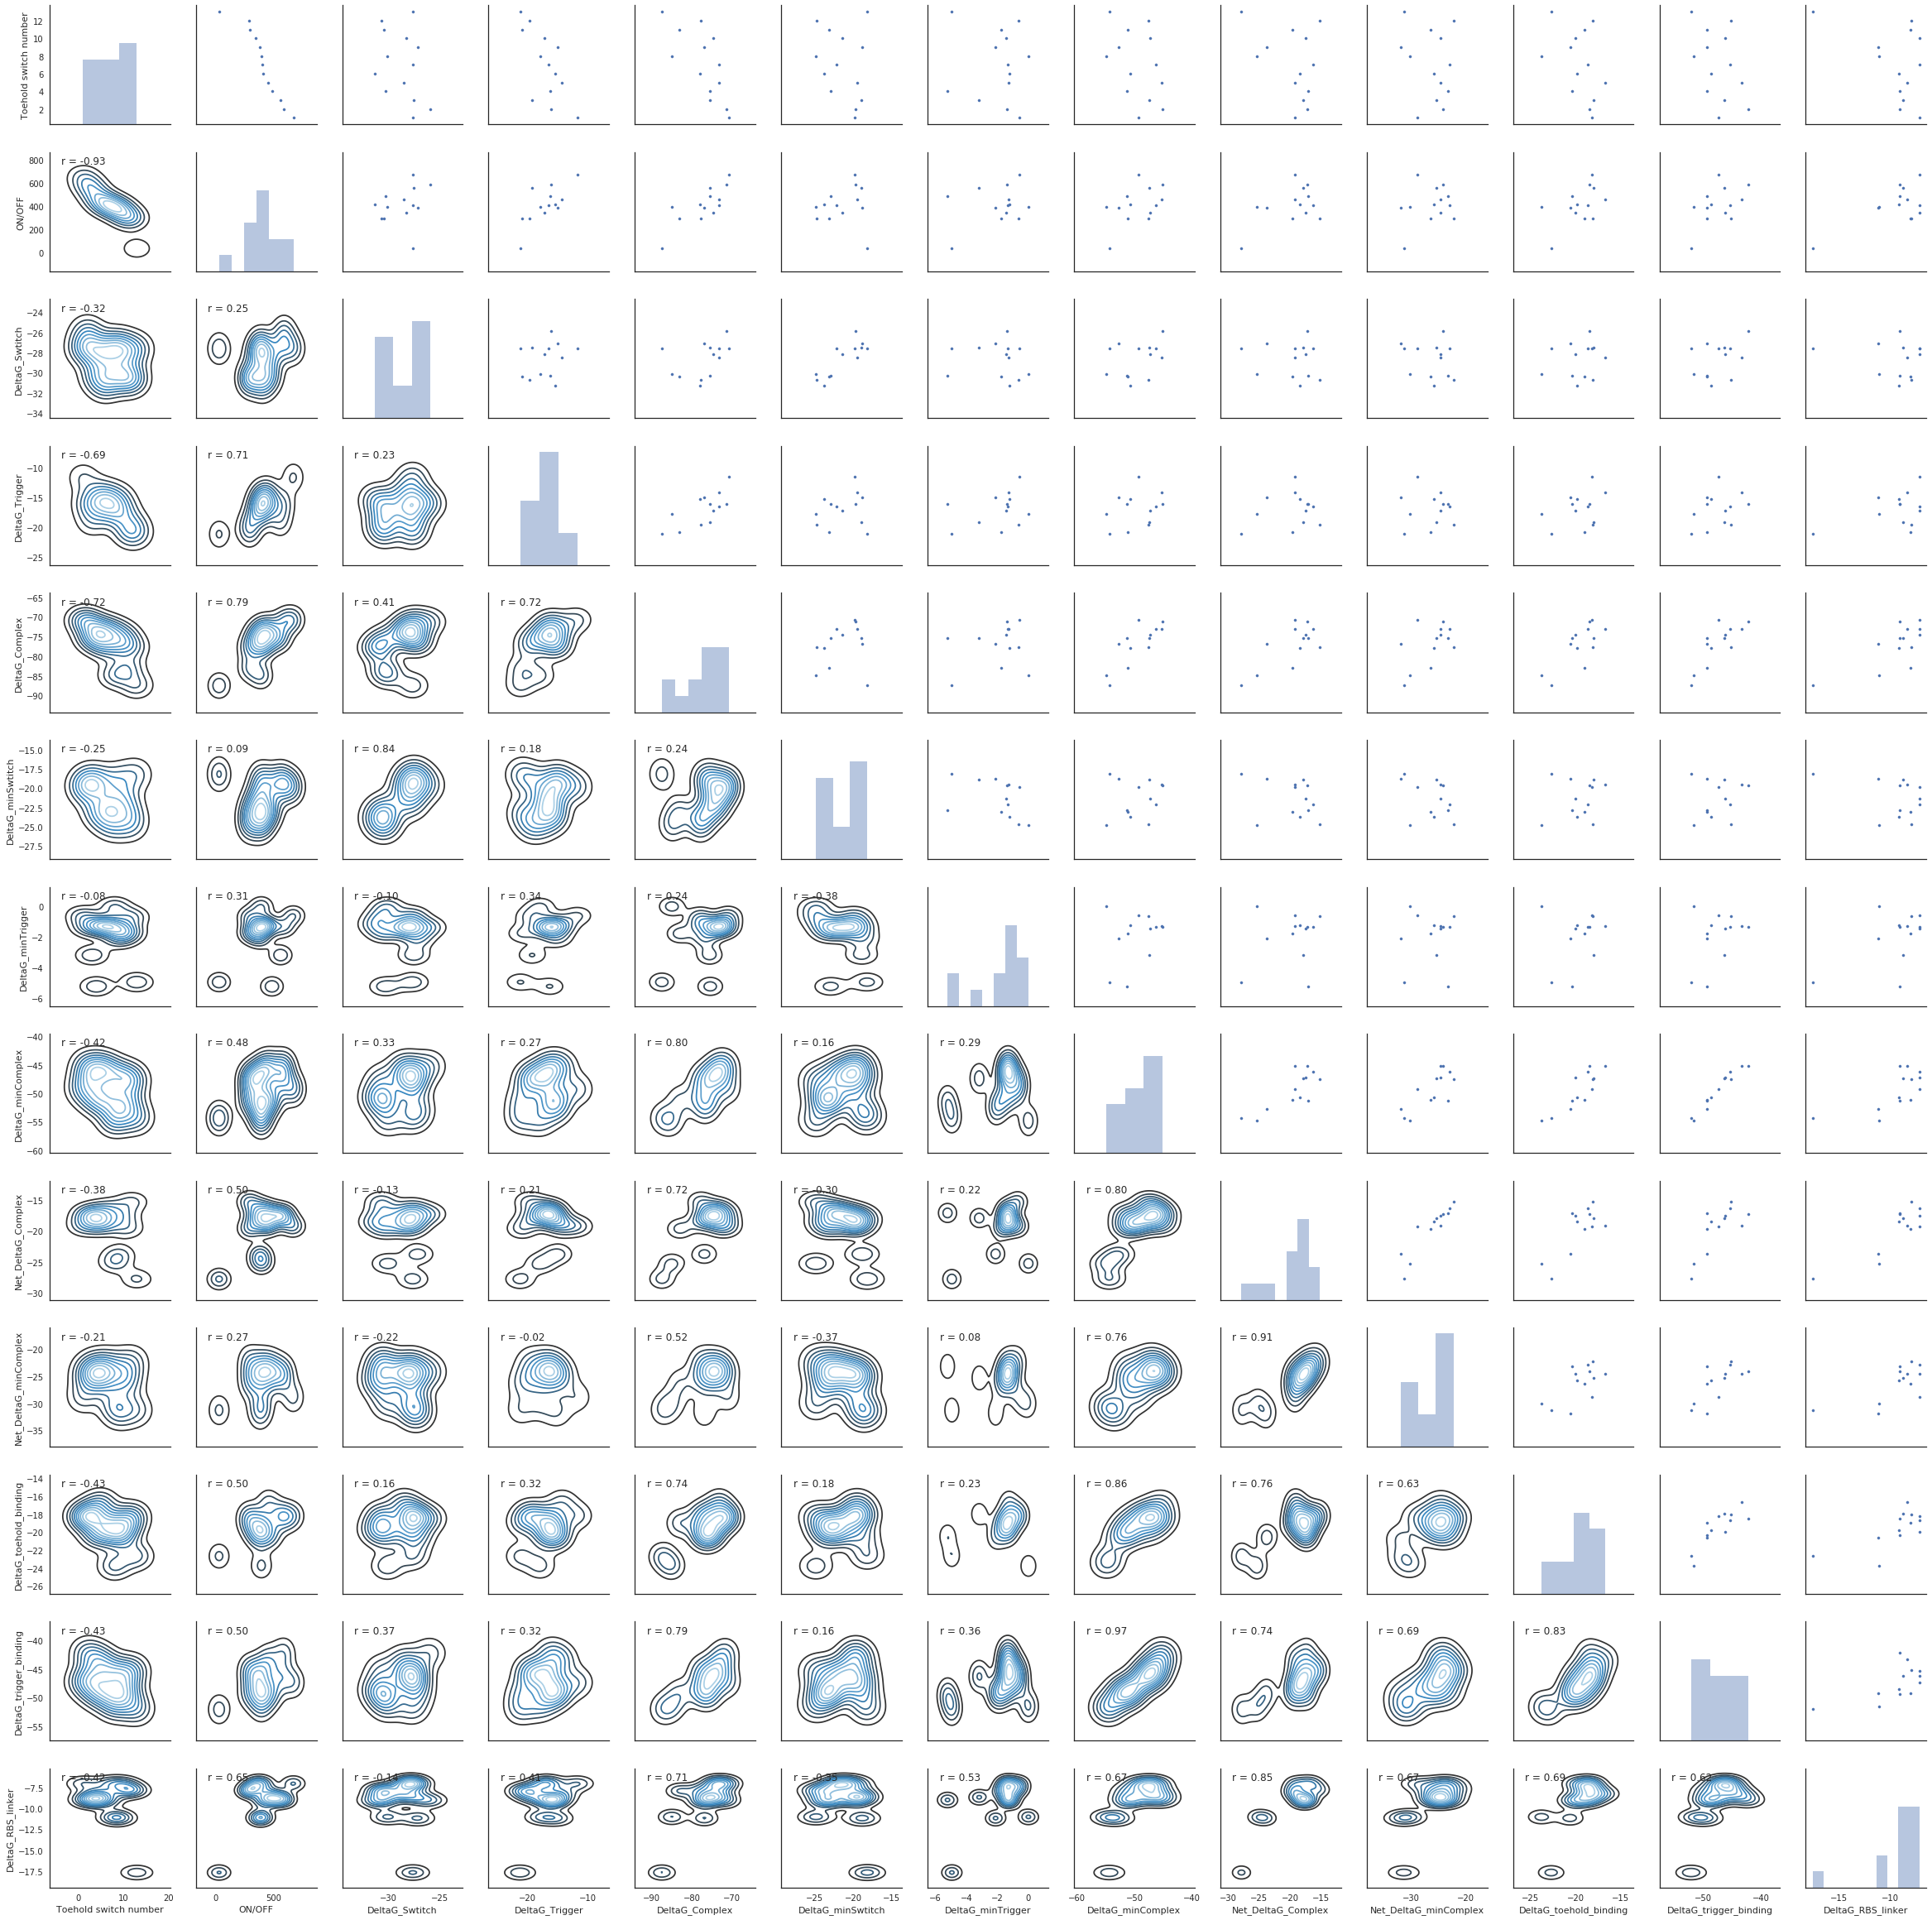

In [532]:
#correlation first analisis
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(a, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.savefig("cor.pdf",dpi=300)